In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [50]:
df=pd.read_csv("marketing_data.csv")

In [51]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [52]:
df.shape

(2240, 28)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [54]:
df.rename({' Income ':'Income'},axis=1,inplace=True)

## Check for null values

In [55]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

## Variable transformation

In [58]:
# change income to float
# Dt_customer to datetime
df['Income'] = df['Income'].str.replace("[$,]","").astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19588\968687995.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Income'] = df['Income'].str.replace("[$,]","").astype(float)


In [59]:
df['Dt_Customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object

In [60]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [62]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Check for outliers

In [63]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

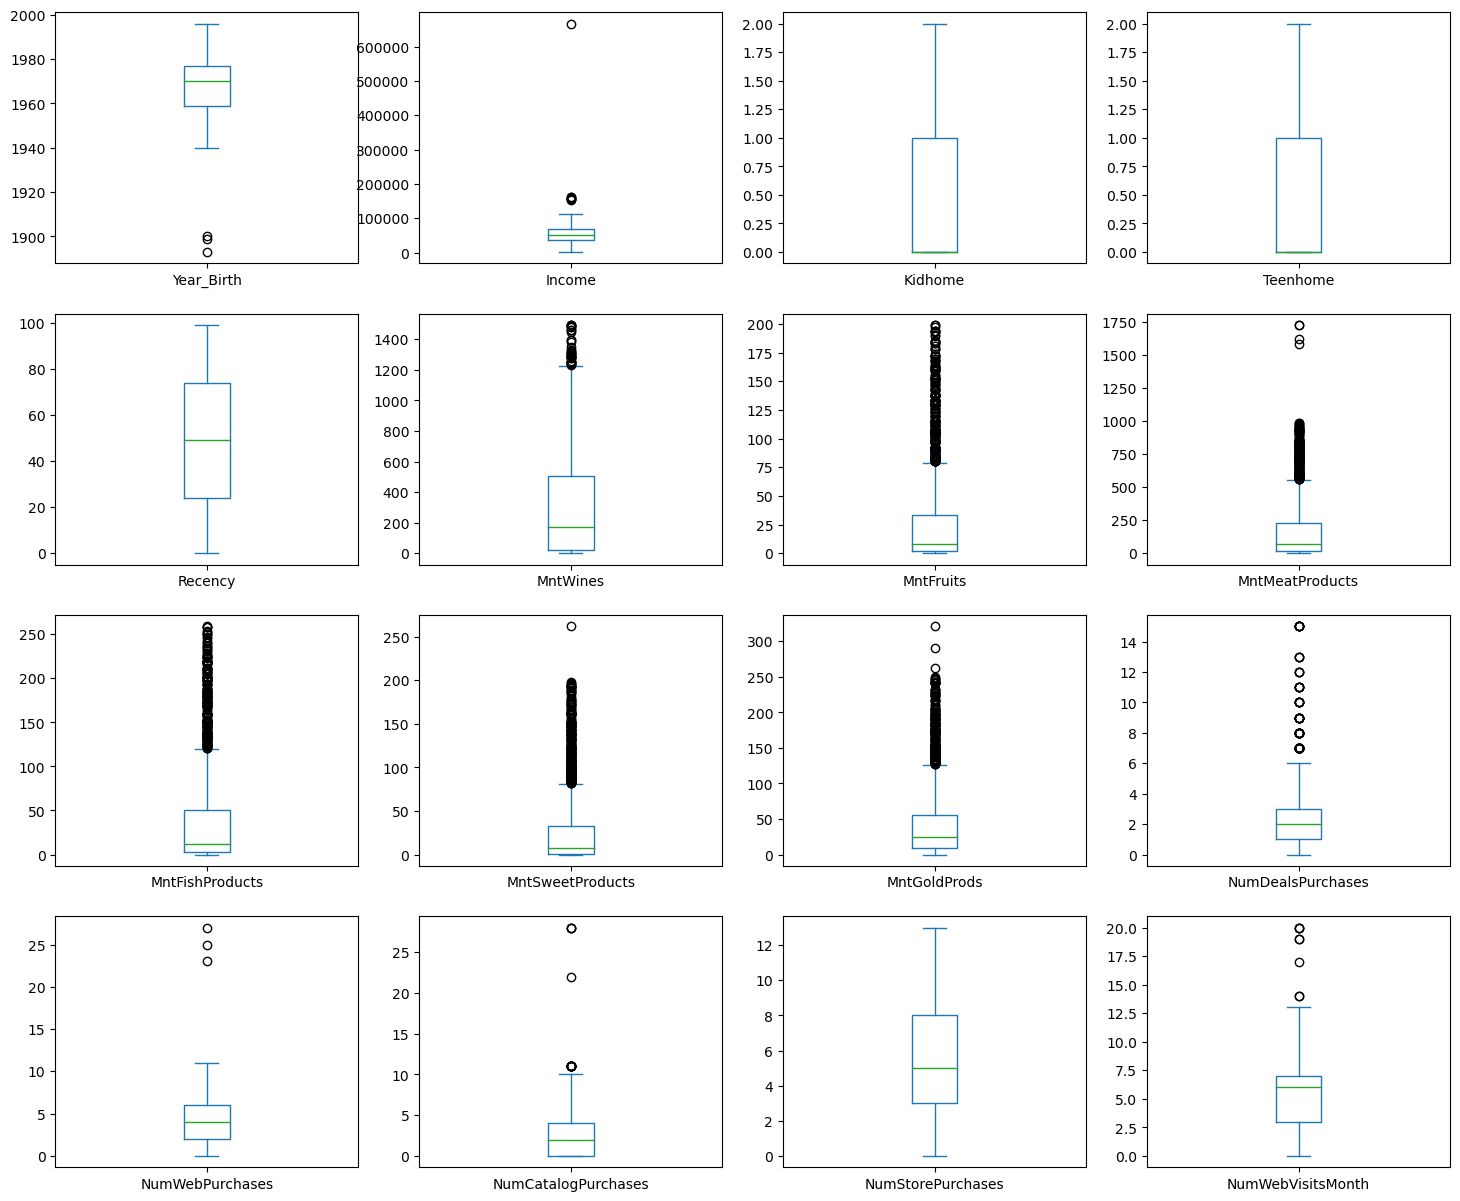

In [64]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Response', 'Complain'])
df[numeric_cols].plot(subplots=True, layout=(4,4), kind='box', figsize=(18,15))

plt.show()

#### Outliers are seen in year_birth and income columns

In [65]:
df = df.drop(df[df['Year_Birth'] <= 1900].index)

In [66]:
df['Year_Birth'].sort_values().head()

2171    1940
1740    1941
1350    1943
1644    1943
1209    1943
Name: Year_Birth, dtype: int64

In [67]:
df[df['Income']>600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [68]:
df = df.drop(df[df['Income'] > 600000].index)

In [69]:
df['Income'].sort_values()

1466      1730.0
961       2447.0
1291      3502.0
663       4023.0
14        4428.0
          ...   
325     157146.0
2204    157243.0
853     157733.0
497     160803.0
731     162397.0
Name: Income, Length: 2212, dtype: float64

In [70]:
# lets check education and marital status columns
df['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [71]:
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

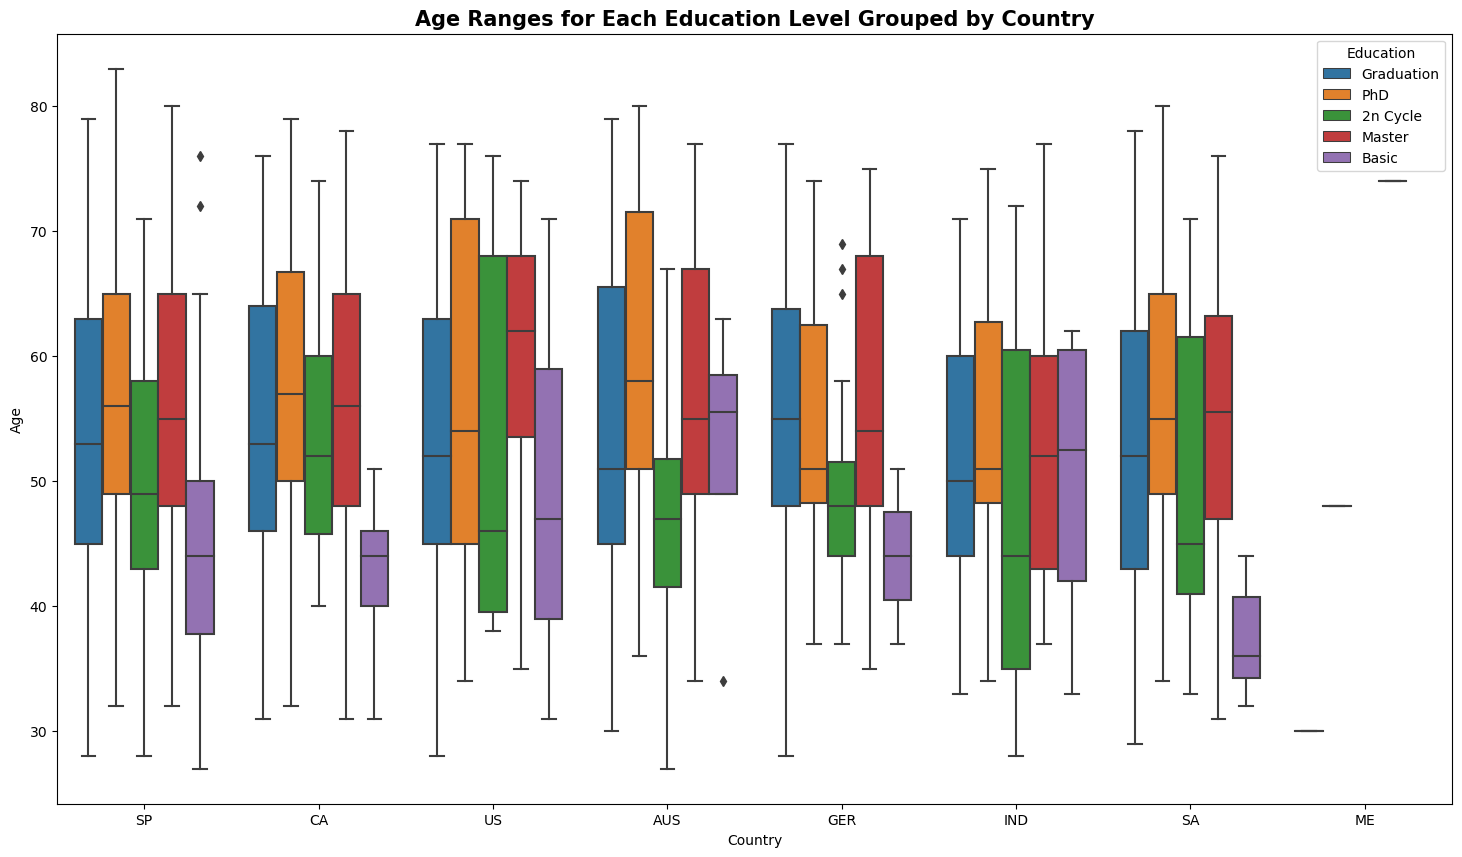

In [72]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Age', hue='Education',data=df)
plt.title("Age Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

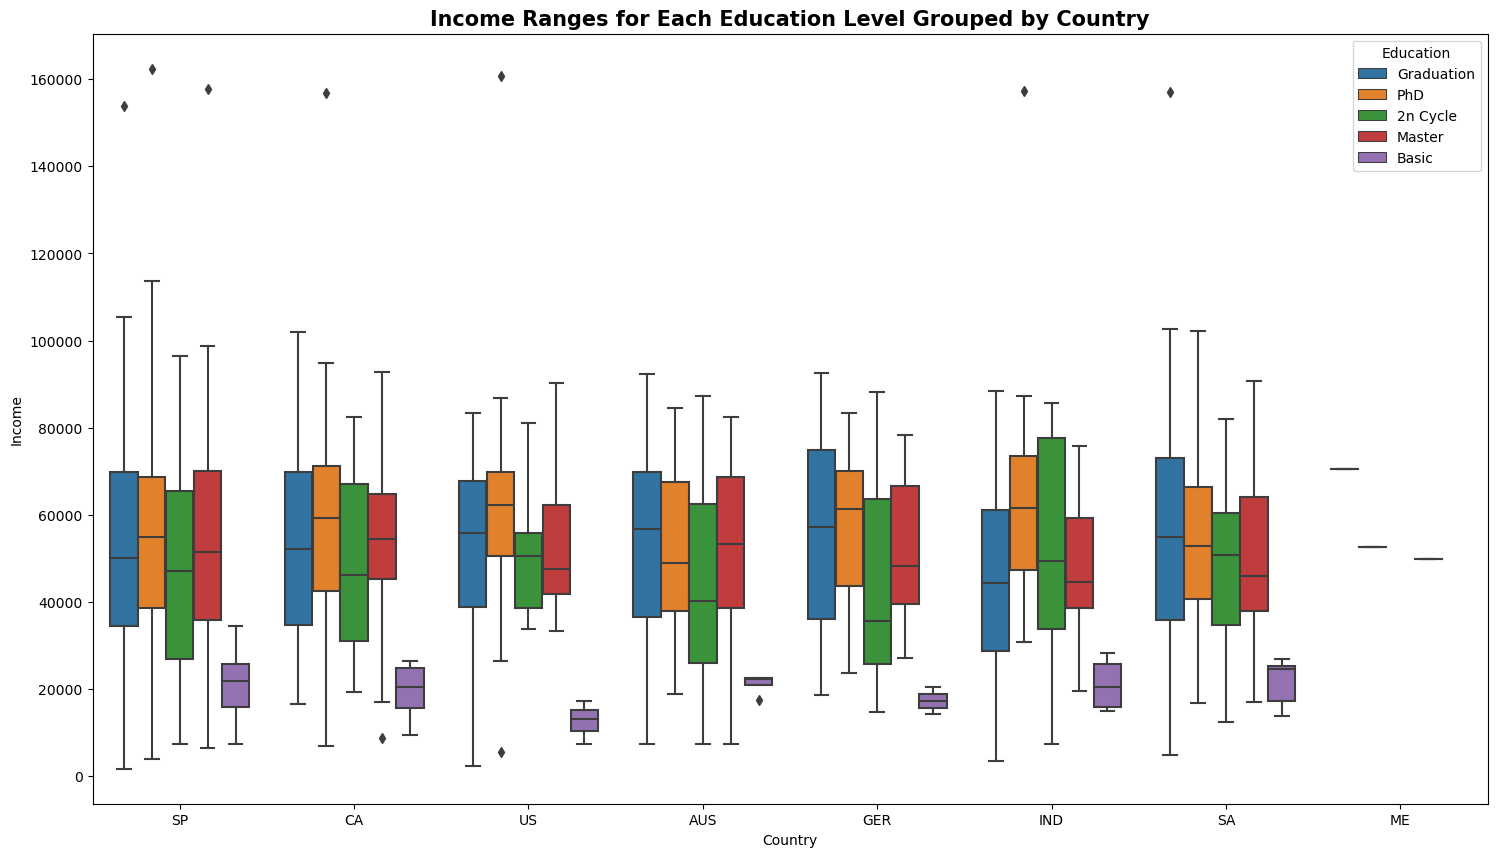

In [73]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Income', hue='Education',data=df)
plt.title("Income Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

In [74]:
education_map = {"Graduation":"Undergraduate", "2n Cycle":"Master", "PhD":"PhD", "Basic":"Basic", "Master":"Master"}

df['New_Education'] = df['Education'].map(education_map, na_action='ignore')

In [75]:
df['New_Education'].value_counts(dropna=False)

Undergraduate    1115
Master            563
PhD               480
Basic              54
Name: New_Education, dtype: int64

In [76]:
df['Education'].value_counts(dropna=False)

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [77]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

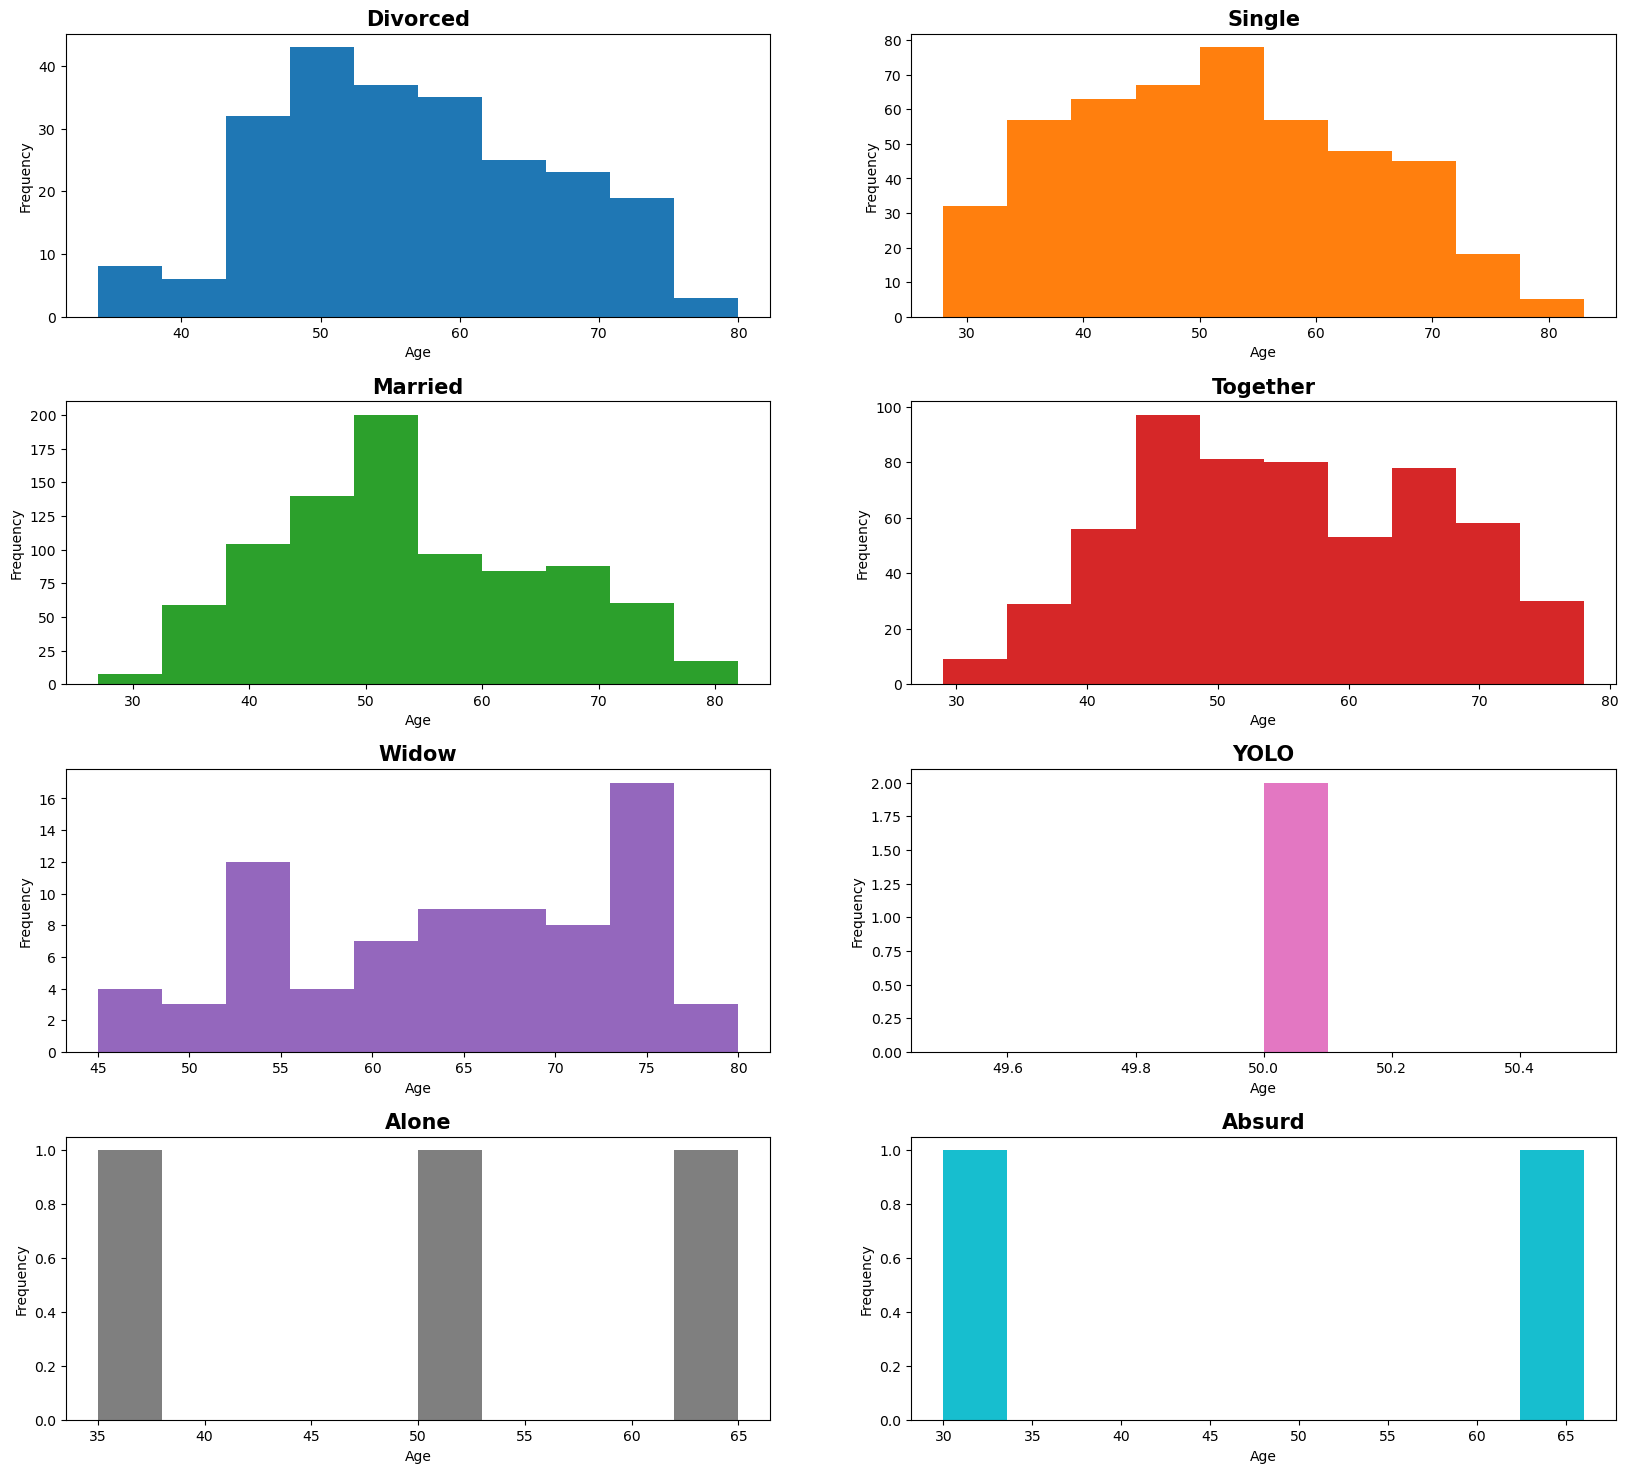

In [78]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20,18))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:pink','tab:gray','tab:cyan']

counter = 0
unique_vals = df['Marital_Status'].unique()

for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ax.hist(df[df['Marital_Status'] == unique_vals[counter]]['Age'],
                color=colors[counter])
        ax.set_title('{}'.format(unique_vals[counter]), fontdict={'fontsize':15, 'fontweight':'bold'})
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
        plt.subplots_adjust(hspace=0.3)

        counter+=1

In [79]:
df['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [80]:
marital_map = {'Divorced':'Divorced', 'Single':'Single', 'Married':'Married', 'Together':'Single', 
               'Widow':'Widow', 'YOLO':'Married', 'Alone':'Single', 'Absurd':'Married'}

df['New_Marital_Status'] = df['Marital_Status'].map(marital_map)

In [81]:
df['New_Marital_Status'].value_counts(dropna=False)

Single      1044
Married      861
Divorced     231
Widow         76
Name: New_Marital_Status, dtype: int64

In [82]:
df['Marital_Status'].value_counts(dropna=False)

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [83]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
ID,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,...,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
Year_Birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,...,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
Income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,...,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
Kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,...,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
Teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,...,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
Recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,...,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
MntWines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,...,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
MntFruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,...,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
MntMeatProducts,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,...,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
MntFishProducts,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,...,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


<AxesSubplot:>

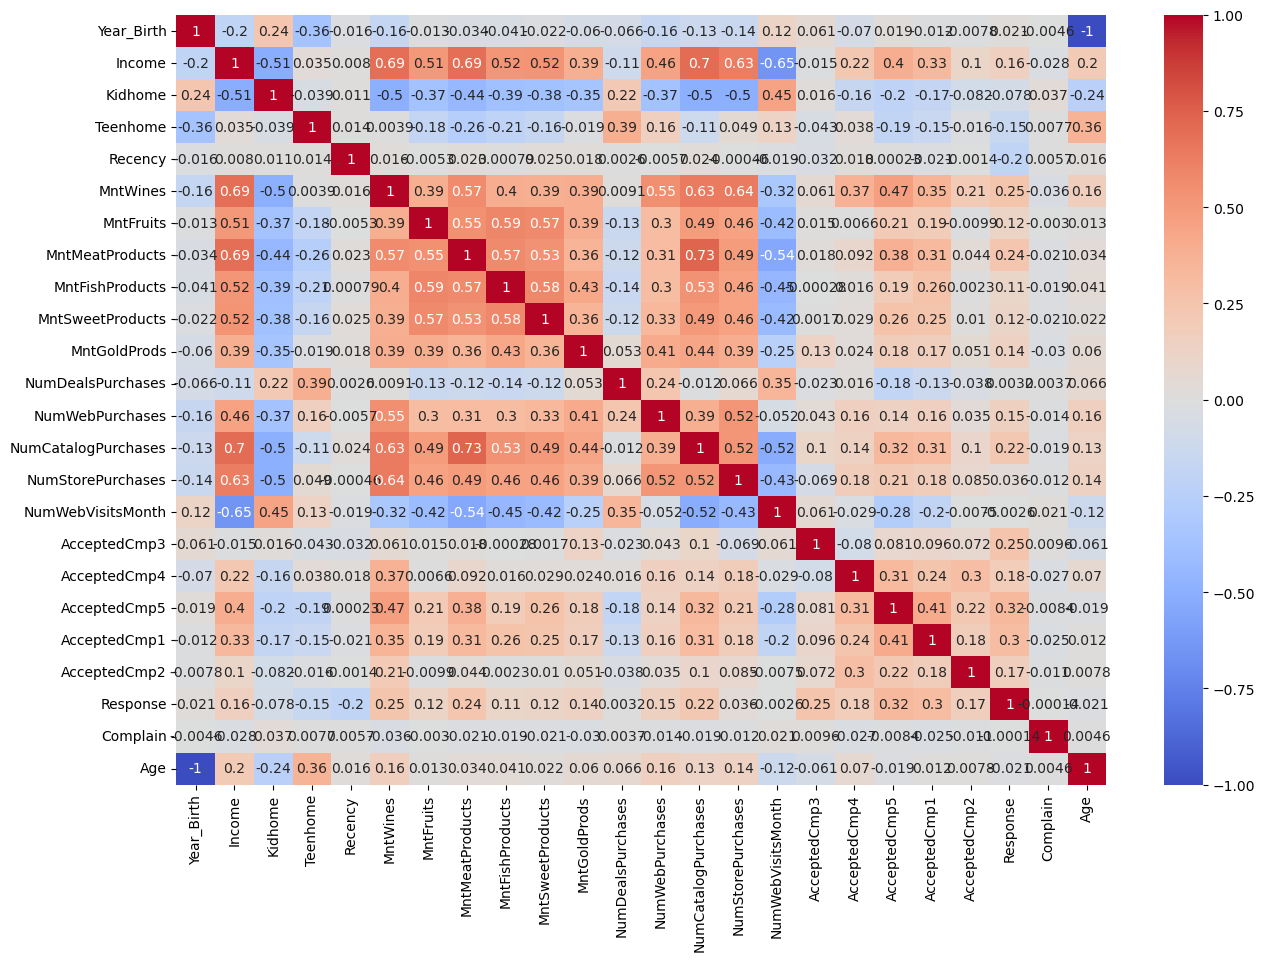

In [84]:
fig = plt.figure(figsize=(15,10))

corr = df.drop('ID', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## ordinal encoding and one hot encoding

In [86]:
categorical_df = df.select_dtypes(exclude='number')

dummy_df = pd.DataFrame()
for col in categorical_df.columns:
    dummy = pd.get_dummies(categorical_df[col], prefix=col)
    dummy_df = pd.concat([dummy_df, dummy], axis=1)
    
df = pd.concat([df, dummy_df], axis=1)
df.drop(categorical_df.columns, axis=1, inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2212 non-null   int64  
 1   Year_Birth               2212 non-null   int64  
 2   Income                   2212 non-null   float64
 3   Kidhome                  2212 non-null   int64  
 4   Teenhome                 2212 non-null   int64  
 5   Recency                  2212 non-null   int64  
 6   MntWines                 2212 non-null   int64  
 7   MntFruits                2212 non-null   int64  
 8   MntMeatProducts          2212 non-null   int64  
 9   MntFishProducts          2212 non-null   int64  
 10  MntSweetProducts         2212 non-null   int64  
 11  MntGoldProds             2212 non-null   int64  
 12  NumDealsPurchases        2212 non-null   int64  
 13  NumWebPurchases          2212 non-null   int64  
 14  NumCatalogPurchases     